In [44]:
import numpy as np
import matplotlib.pyplot as plt


# D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
X = np.array(np.linspace(-3, 3, 9))
Y = np.array(X ** 2 + 5 * np.random.normal(0, 1, 9))

In [3]:
np.hstack([np.ones(len(D)).reshape((-1, 1)), D[:,:-1]])

array([[1., 1.],
       [1., 3.],
       [1., 6.],
       [1., 8.]])

In [4]:
class MultipleRegression():
    
    def __init__(self, add_constant=True):
        self.w = None
        self.add_constant = add_constant
    
    def train(self, examples):
        x = examples[:,:-1]
        if self.add_constant:
            x = np.hstack([np.ones(len(x)).reshape((-1, 1)), x])
        y = examples[:,-1].reshape((-1, 1))
        self.w = np.linalg.inv(x.T @ x) @ x.T @ y
        return self
    
    def predict(self, x):
        if len(x.shape) == 1:
            x = x.reshape((-1, 1))
        if self.add_constant:
            x = np.hstack([np.ones(len(x)).reshape((-1, 1)), x])
        return (x @ self.w).flatten()

In [6]:
model = MultipleRegression().train(D)
model.w

array([[3.31034483],
       [0.43103448]])

In [8]:
from numpy.polynomial import Polynomial


w = Polynomial.fit(X, Y, deg=1).convert()
np.testing.assert_allclose(model.w.flatten(), w.coef)
w

Polynomial([3.31034483, 0.43103448], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [42]:
# x2 = np.array([X ** i for i in range(2)]).T
x2 = np.vstack([[X ** i for i in range(1, 10)], Y]).T
x2

array([[-3.00000000e+00,  9.00000000e+00, -2.70000000e+01,
         8.10000000e+01, -2.43000000e+02,  7.29000000e+02,
        -2.18700000e+03,  6.56100000e+03, -1.96830000e+04,
         1.06171446e+01],
       [-2.25000000e+00,  5.06250000e+00, -1.13906250e+01,
         2.56289062e+01, -5.76650391e+01,  1.29746338e+02,
        -2.91929260e+02,  6.56840836e+02, -1.47789188e+03,
         2.53779056e+00],
       [-1.50000000e+00,  2.25000000e+00, -3.37500000e+00,
         5.06250000e+00, -7.59375000e+00,  1.13906250e+01,
        -1.70859375e+01,  2.56289062e+01, -3.84433594e+01,
         1.15238868e+01],
       [-7.50000000e-01,  5.62500000e-01, -4.21875000e-01,
         3.16406250e-01, -2.37304688e-01,  1.77978516e-01,
        -1.33483887e-01,  1.00112915e-01, -7.50846863e-02,
        -7.78993362e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.

In [43]:
model2 = MultipleRegression().train(x2)
model2.w

array([[ -4.24674111],
       [ 19.94395767],
       [ 11.69969296],
       [-15.91811522],
       [ -4.7486054 ],
       [  1.85192088],
       [  0.69244123],
       [  0.27824496],
       [ -0.0316275 ],
       [ -0.03478056]])

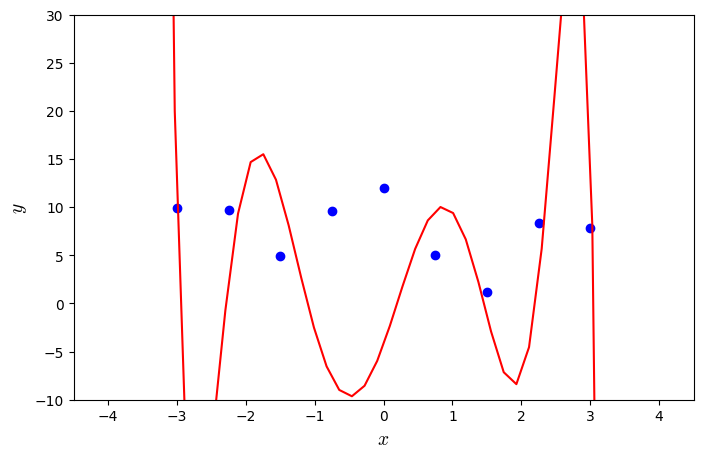

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.rcParams['mathtext.fontset'] = 'cm'

x_graph = np.linspace(-4.5, 4.5)
ax.scatter(X, Y, color='blue', label='Data')
ax.plot(x_graph, sum(model2.w[i] * x_graph ** i for i in range(0, 10)), color='red', label='Linear regression')

ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-10, 30)

ax.set_xlabel(r'$x$', fontsize=14)  
ax.set_ylabel(r'$y$', fontsize=14)
plt.show()


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
pipeline.fit(X.reshape(-1, 1), Y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [39]:
w2 = np.hstack([np.array([pipeline[-1].intercept_]), pipeline[-1].coef_])

In [40]:
np.testing.assert_allclose(model2.w.flatten(), w2)
print(w2)

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 3 / 3 (100%)
Max absolute difference: 1.91742563
Max relative difference: 1.71514264
 x: array([ 0.799486, -0.031157,  0.834893])
 y: array([-1.117939,  0.340808,  1.482534])